# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
#print(f"Number of cities in the list: {len(cities)}")
cities

['sitka',
 'aasiaat',
 'adamstown',
 'qaqortoq',
 'kandiari',
 'waitangi',
 'alice springs',
 'london',
 'iquique',
 'port-aux-francais',
 'hasaki',
 'grand-fort-philippe',
 'yelizovo',
 'ribeira grande',
 'ust-nera',
 'nemuro',
 'tura',
 'kristinestad',
 'papatowai',
 'hawaiian paradise park',
 'iqaluit',
 'haiku-pauwela',
 'pisco',
 'hermanus',
 'udachny',
 'port lincoln',
 'nicoya',
 'bethel',
 'margaret river',
 'mancio lima',
 'broceni',
 'tiksi',
 'amursk',
 'ixtapa',
 'thisted',
 'caleta de carquin',
 'blackmans bay',
 'gongzhuling',
 'riasi',
 'thompson',
 'college',
 'hithadhoo',
 'isafjordur',
 'edinburgh of the seven seas',
 'ancud',
 'ponta delgada',
 'mont-laurier',
 'albany',
 'al qaryatayn',
 'ankazobe',
 'arteche',
 'jamestown',
 'taiohae',
 'esmeraldas',
 'tuburan',
 "'ohonua",
 'hadibu',
 'tokombere',
 'makarov',
 'basco',
 'enewetak',
 'mahdia',
 'bredasdorp',
 'turpan',
 'puerto deseado',
 'labrador city',
 'ambon',
 'howard springs',
 'buaran',
 'axim',
 'banda ace

---

In [3]:
url="https://api.openweathermap.org/data/2.5/weather?q="
city_url=f"{url}{cities[0]}&appid={weather_api_key}"
requests.get(city_url).json()

{'coord': {'lon': -135.33, 'lat': 57.0531},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 285.09,
  'feels_like': 284.61,
  'temp_min': 285.09,
  'temp_max': 285.09,
  'pressure': 1017,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 240},
 'rain': {'1h': 0.21},
 'clouds': {'all': 75},
 'dt': 1686342608,
 'sys': {'type': 1,
  'id': 7795,
  'country': 'US',
  'sunrise': 1686312522,
  'sunset': 1686376359},
 'timezone': -28800,
 'id': 5557293,
 'name': 'Sitka',
 'cod': 200}

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url="https://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url=f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:  
        print("City not found. Skipping...")
        print (e)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | kandiari
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | london
Processing Record 9 of Set 1 | iquique
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | grand-fort-philippe
Processing Record 13 of Set 1 | yelizovo
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | kristinestad
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | haiku-pauwela
Process

Processing Record 41 of Set 4 | karema
Processing Record 42 of Set 4 | khategaon
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | flying fish cove
Processing Record 46 of Set 4 | ocean pointe
City not found. Skipping...
'coord'
Processing Record 47 of Set 4 | weno
Processing Record 48 of Set 4 | carbonear
Processing Record 49 of Set 4 | pacific grove
Processing Record 0 of Set 5 | fort st. john
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | glace bay
Processing Record 3 of Set 5 | mumbwa
Processing Record 4 of Set 5 | san jose del guaviare
Processing Record 5 of Set 5 | lihue
Processing Record 6 of Set 5 | grantsville
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | carrigaline
Processing Record 9 of Set 5 | cidade velha
Processing Record 10 of Set 5 | nova sintra
Processing Record 11 of Set 5 | kone
Processing Record 12 of Set 5 | zaozersk
Processing Record 13 of Se

Processing Record 28 of Set 8 | las tablas
Processing Record 29 of Set 8 | east london
Processing Record 30 of Set 8 | matoury
Processing Record 31 of Set 8 | revda
Processing Record 32 of Set 8 | nuuk
Processing Record 33 of Set 8 | hilo
Processing Record 34 of Set 8 | al-`ula
City not found. Skipping...
'coord'
Processing Record 35 of Set 8 | singarayakonda
Processing Record 36 of Set 8 | walvis bay
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | boa vista
Processing Record 39 of Set 8 | bodo
Processing Record 40 of Set 8 | uva
Processing Record 41 of Set 8 | lucea
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | al burayqah
Processing Record 44 of Set 8 | nuku'alofa
Processing Record 45 of Set 8 | puerto armuelles
Processing Record 46 of Set 8 | strzyzow
Processing Record 47 of Set 8 | suva
Processing Record 48 of Set 8 | viligili
City not found. Skipping...
'coord'
Processing Record 49 of Set 8 | pingyin
Processing Record 0 of

Processing Record 9 of Set 12 | onguday
Processing Record 10 of Set 12 | santa ana
Processing Record 11 of Set 12 | dogondoutchi
Processing Record 12 of Set 12 | salalah
Processing Record 13 of Set 12 | port augusta
Processing Record 14 of Set 12 | el galpon
Processing Record 15 of Set 12 | sollenau
Processing Record 16 of Set 12 | san mariano
Processing Record 17 of Set 12 | opuwo
Processing Record 18 of Set 12 | ternate
Processing Record 19 of Set 12 | antonio enes
Processing Record 20 of Set 12 | as sulayyil
Processing Record 21 of Set 12 | mount darwin
Processing Record 22 of Set 12 | yomju-up
Processing Record 23 of Set 12 | tazacorte
Processing Record 24 of Set 12 | great bend
Processing Record 25 of Set 12 | dauphin
Processing Record 26 of Set 12 | forres
Processing Record 27 of Set 12 | san jose de guanipa
Processing Record 28 of Set 12 | palikir - national government center
Processing Record 29 of Set 12 | kerch
Processing Record 30 of Set 12 | puerto carreno
Processing Record

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,285.09,87,75,3.60,US,1686343239
1,aasiaat,68.7098,-52.8699,273.98,83,100,6.06,GL,1686343204
2,adamstown,-25.0660,-130.1015,294.38,60,52,7.07,PN,1686343327
3,qaqortoq,60.7167,-46.0333,279.03,68,70,1.58,GL,1686343205
4,kandiari,26.9156,68.5216,304.36,59,0,9.49,PK,1686343328


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,285.09,87,75,3.60,US,1686343239
1,aasiaat,68.7098,-52.8699,273.98,83,100,6.06,GL,1686343204
2,adamstown,-25.0660,-130.1015,294.38,60,52,7.07,PN,1686343327
3,qaqortoq,60.7167,-46.0333,279.03,68,70,1.58,GL,1686343205
4,kandiari,26.9156,68.5216,304.36,59,0,9.49,PK,1686343328


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

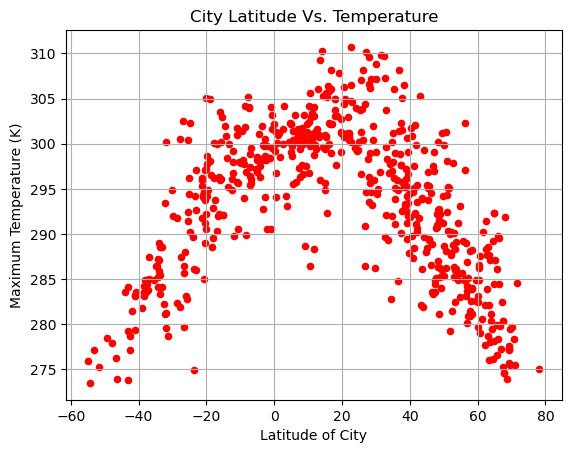

In [27]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot(kind="scatter",x="Lat", y="Max Temp", c="red", title='City Latitude Vs. Temperature',xlabel='Latitude of City',ylabel='Maximum Temperature (K)')
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

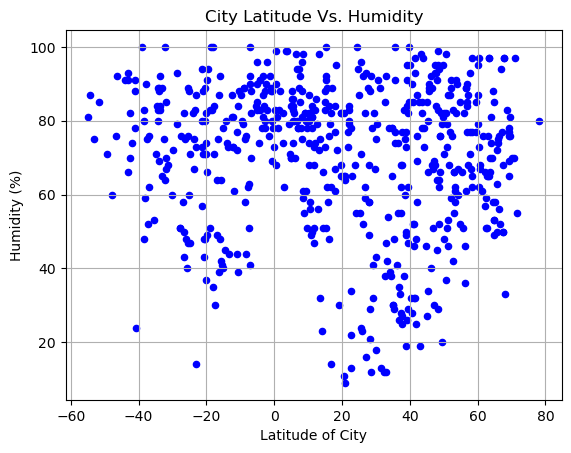

In [28]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter",x="Lat", y="Humidity", c="blue", title='City Latitude Vs. Humidity',xlabel='Latitude of City',ylabel='Humidity (%)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

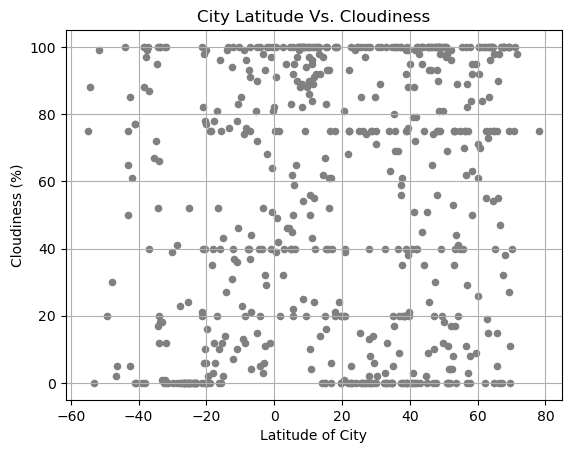

In [29]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter",x="Lat", y="Cloudiness", c="gray", title='City Latitude Vs. Cloudiness',xlabel='Latitude of City',ylabel='Cloudiness (%)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

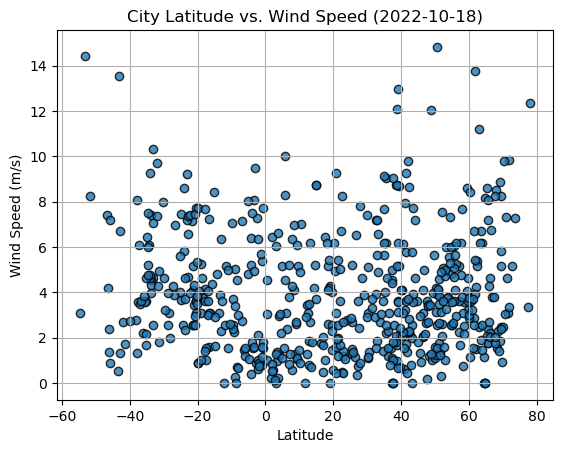

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


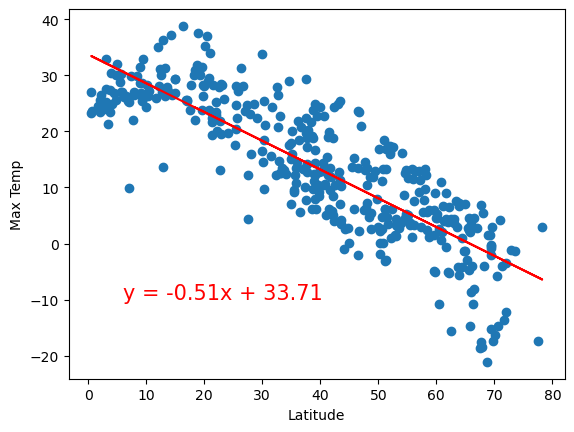

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


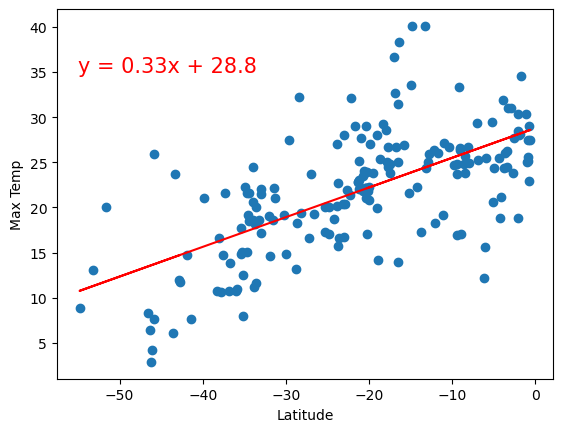

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


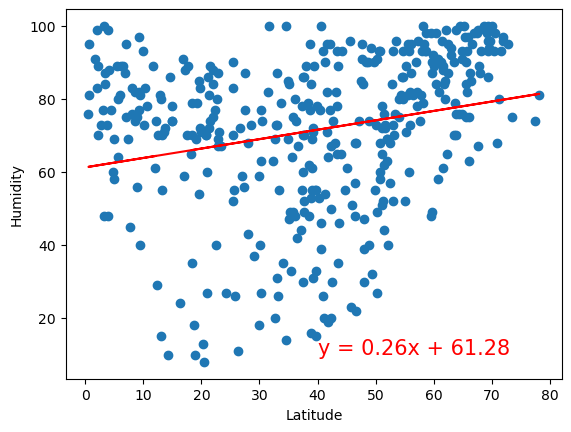

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


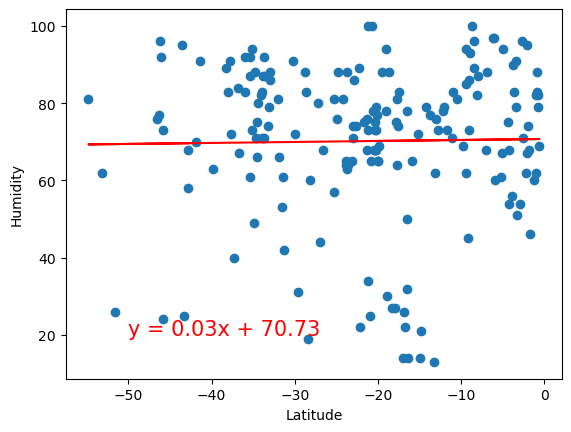

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


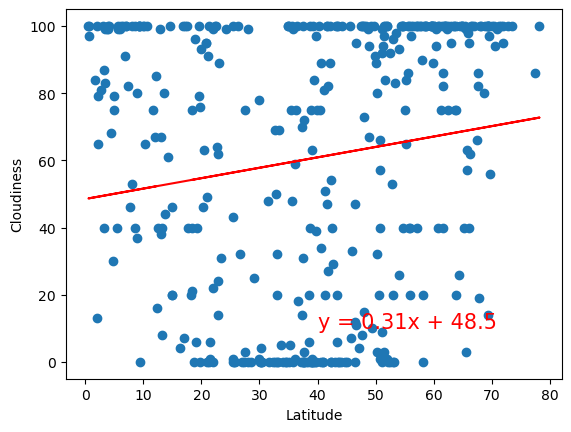

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


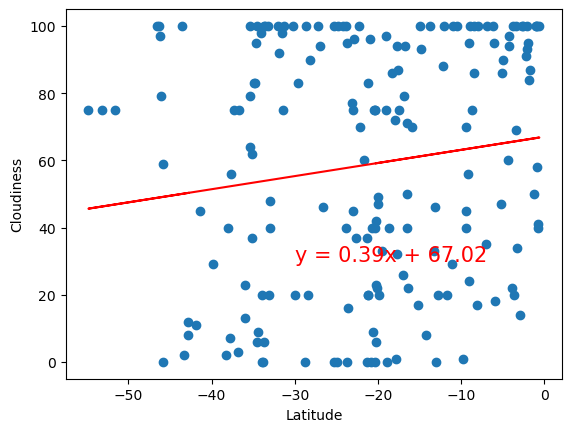

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


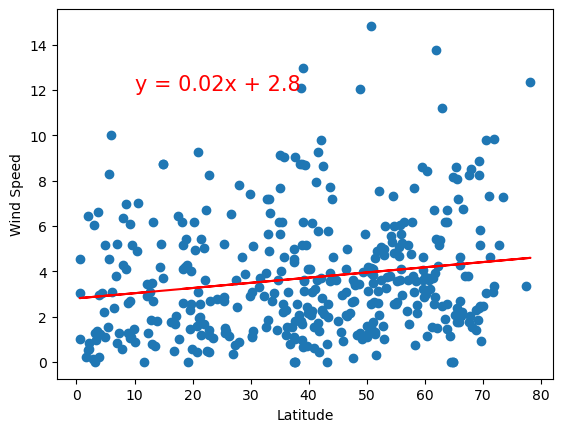

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


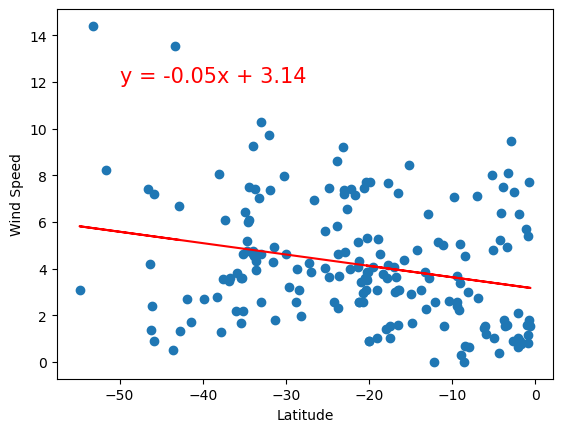

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE